# EDA General de Víctimas y Hechos

En este archivo se realizará un análisis exploratorio de los datos de los archivos resultantes de los edas anteriores (archivos: hechos.csv y victimas.csv) combinados  en búsqueda de valores faltantes, valores atípicos/extremos u outliers y registros duplicados.

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sys

# Ignorar todas las advertencias
warnings.filterwarnings("ignore")

sys.path.append("..")
# importar librerías personalizadas de ./functions/EDA.py
from functions.EDA import get_frequency

## Cargar los Datos

In [3]:
# se importas los datasets
hechos = pd.read_csv('../src/data/hechos.csv')
victimas = pd.read_csv('../src/data/victimas.csv')

In [14]:
# se realiza un merge entre víctimas y hechos
df = pd.merge(hechos, victimas, left_on='ID', right_on='ID_hecho')

## Exploración de los Datos

### Vista rápida de los datos

In [15]:
# se verifica la estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               714 non-null    object 
 1   N_VICTIMAS       714 non-null    int64  
 2   FECHA_x          714 non-null    object 
 3   HH               713 non-null    float64
 4   LUGAR_DEL_HECHO  714 non-null    object 
 5   TIPO_DE_CALLE    714 non-null    object 
 6   Cruce            714 non-null    bool   
 7   COMUNA           714 non-null    int64  
 8   pos x            703 non-null    float64
 9   pos y            703 non-null    float64
 10  PARTICIPANTES    711 non-null    object 
 11  VICTIMA_x        707 non-null    object 
 12  ACUSADO          694 non-null    object 
 13  ID_hecho         714 non-null    object 
 14  FECHA_y          714 non-null    object 
 15  ROL              705 non-null    object 
 16  VICTIMA_y        707 non-null    object 
 17  SEXO            

In [16]:
# se describe el df
df.describe()

,N_VICTIMAS,HH,COMUNA,pos x,pos y,EDAD
count,714.000000,713.000000,714.000000,703.000000,703.000000,664.000000
mean,1.061625,11.575035,7.456583,-58.441756,-34.619676,42.167169
std,0.257533,6.678642,4.374662,0.046366,0.035311,19.788034
min,1.000000,0.000000,1.000000,-58.529942,-34.705250,1.000000
25%,1.000000,6.000000,4.000000,-58.476776,-34.643980,27.000000
50%,1.000000,11.000000,8.000000,-58.444513,-34.622849,37.000000
75%,1.000000,17.000000,11.000000,-58.401944,-34.596991,56.250000
max,3.000000,23.000000,15.000000,-58.356082,-34.534654,95.000000


In [17]:
# se vilualizan las primeras filas
df.head()

,ID,N_VICTIMAS,FECHA_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD
0,2016-0001,1,2016-01-01,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,True,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO,2016-0001,2016-01-01,CONDUCTOR,MOTO,MASCULINO,19.0
1,2016-0002,1,2016-01-02,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,True,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS,2016-0002,2016-01-02,CONDUCTOR,AUTO,MASCULINO,70.0
2,2016-0003,1,2016-01-03,7.0,AV ENTRE RIOS 2034,AVENIDA,False,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO,2016-0003,2016-01-03,CONDUCTOR,MOTO,MASCULINO,30.0
3,2016-0004,1,2016-01-10,0.0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,True,8,-58.465039,-34.680930,MOTO-SD,MOTO,NaN,2016-0004,2016-01-10,CONDUCTOR,MOTO,MASCULINO,18.0
4,2016-0005,1,2016-01-21,5.0,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,True,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS,2016-0005,2016-01-21,CONDUCTOR,MOTO,MASCULINO,29.0


## Limpieza de los Datos

In [31]:
# contar nulos
df.isna().sum()

ID                  0
FECHA_x             0
HH                  1
LUGAR_DEL_HECHO     0
TIPO_DE_CALLE       0
Cruce               0
COMUNA              0
pos x              11
pos y              11
PARTICIPANTES       3
ACUSADO            20
ROL                 9
VICTIMA_y           7
SEXO                3
EDAD               50
dtype: int64

In [28]:
# buscar incongruencias
df[df['VICTIMA_x'] != df['VICTIMA_y']]

,ID,N_VICTIMAS,FECHA_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD
76,2016-0101,1,2016-08-07,19.0,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,True,9,-58.529329,-34.650150,NaN,NaN,NaN,2016-0101,2016-08-07,NaN,NaN,MASCULINO,67.0
88,2016-0115,1,2016-09-02,11.0,ARIAS Y TRONADOR,CALLE,True,12,-58.489350,-34.549177,SD-CARGAS,NaN,CARGAS,2016-0115,2016-09-02,NaN,NaN,MASCULINO,NaN
92,2016-0119,1,2016-09-04,6.0,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,True,12,-58.496592,-34.563536,NaN,NaN,NaN,2016-0119,2016-09-04,PASAJERO_ACOMPAÑANTE,NaN,FEMENINO,NaN
164,2017-0029,1,2017-03-07,2.0,MOZART Y TANDIL,CALLE,True,9,-58.485013,-34.647425,SD-AUTO,NaN,AUTO,2017-0029,2017-03-07,NaN,NaN,MASCULINO,34.0
205,2017-0074,1,2017-06-04,12.0,CASCO 133,CALLE,False,9,-58.525671,-34.637878,NaN,NaN,NaN,2017-0074,2017-06-04,NaN,NaN,MASCULINO,70.0
218,2017-0089,1,2017-07-13,12.0,MARTINIANO LEGUIZAMON 901,CALLE,False,9,-58.515147,-34.647871,SD-AUTO,NaN,AUTO,2017-0089,2017-07-13,NaN,NaN,MASCULINO,23.0
234,2017-0108,2,2017-09-02,4.0,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,True,12,-58.494911,-34.547956,AUTO-OBJETO FIJO,OBJETO FIJO,OBJETO FIJO,2017-0108,2017-09-02,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,17.0
235,2017-0108,2,2017-09-02,4.0,AV. GRAL. PAZ Y MACHAIN,GRAL PAZ,True,12,-58.494911,-34.547956,AUTO-OBJETO FIJO,OBJETO FIJO,OBJETO FIJO,2017-0108,2017-09-02,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,10.0
277,2017-0155,1,2017-12-12,21.0,AV. RIVADAVIA 6350,AVENIDA,False,7,-58.455939,-34.626569,SD-MOTO,NaN,MOTO,2017-0155,2017-12-12,NaN,NaN,MASCULINO,77.0
599,2020-0063,2,2020-12-05,7.0,NUEVA YORK Y ALTA GRACIA,CALLE,True,11,-58.527838,-34.610470,PEATON_MOTO-MOTO,PEATON_MOTO,MOTO,2020-0063,2020-12-05,PEATON,PEATON,MASCULINO,38.0


VICTIMA_y tiene divididas a las víctimas (ejemplo: en el registro 2020-0063 VICTIMA_x tiene PEATON_MOTO en ambos registros repetidos, dado que se hizo un merge, pero en VICTIMA_y figuran en un registro PEATON y en el otro MOTO). Sin embargo, hay registros de VICTIMA_x que tienen como valor OBJETO_FIJO que si se reemplazan por el rol quedarían datos erróneos sobre los participantes, por lo que si los elementos en VICTIMA_x son OBJETO FIJO, este se pasará a la columna ACUSADO antes de eliminar la columna VICTIMA_x.

In [27]:
# reemplazar dato en la columna ACUSADO si en la columna VICTIMA_x el dato es OBJETO FIJO
df.loc[df['VICTIMA_x'] == 'OBJETO FIJO', 'ACUSADO'] = df.loc[df['VICTIMA_x'] == 'OBJETO FIJO', 'VICTIMA_x']

In [29]:
# revisar las fechas que no coinciden
df[df['FECHA_x'] != df['FECHA_y']]

,ID,N_VICTIMAS,FECHA_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA_x,ACUSADO,ID_hecho,FECHA_y,ROL,VICTIMA_y,SEXO,EDAD
64,2016-0087,1,2016-07-02,0.0,AUTOPISTA 1 SUR PTE ARTURO FRONDIZI Y AV CASEROS,AUTOPISTA,False,1,-58.378646,-34.629071,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO,2016-0087,2016-07-03,CONDUCTOR,MOTO,MASCULINO,23.0
201,2017-0069,1,2017-05-24,14.0,AV. GRAL. PAZ Y ULRICO SCHMIDL,GRAL PAZ,True,9,-58.521731,-34.659975,MOTO-SD,MOTO,NaN,2017-0069,2017-05-29,CONDUCTOR,MOTO,MASCULINO,39.0


Las fechas que no coinciden varían una en un día y la otra en cinco días, por lo que se decide quedarse con FECHA_x. Dado que ahora se tienen todas las víctimas asociadas a sus respectivos hechos, la columna N_VICTIMAS también es innecesaria.

In [30]:
# eliminar columnas redundantes (ID_hecho, VICTIMA_x, FECHA_y, N_VICTIMAS)
df.drop(['ID_hecho', 'VICTIMA_x', 'FECHA_y', 'N_VICTIMAS'], axis=1, inplace=True)

# visualizar primeros elementos
df.head(3)

,ID,FECHA_x,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,Cruce,COMUNA,pos x,pos y,PARTICIPANTES,ACUSADO,ROL,VICTIMA_y,SEXO,EDAD
0,2016-0001,2016-01-01,4.0,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,True,8,-58.475340,-34.687570,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19.0
1,2016-0002,2016-01-02,1.0,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,True,9,-58.508775,-34.669777,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70.0
2,2016-0003,2016-01-03,7.0,AV ENTRE RIOS 2034,AVENIDA,False,1,-58.390403,-34.631894,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30.0


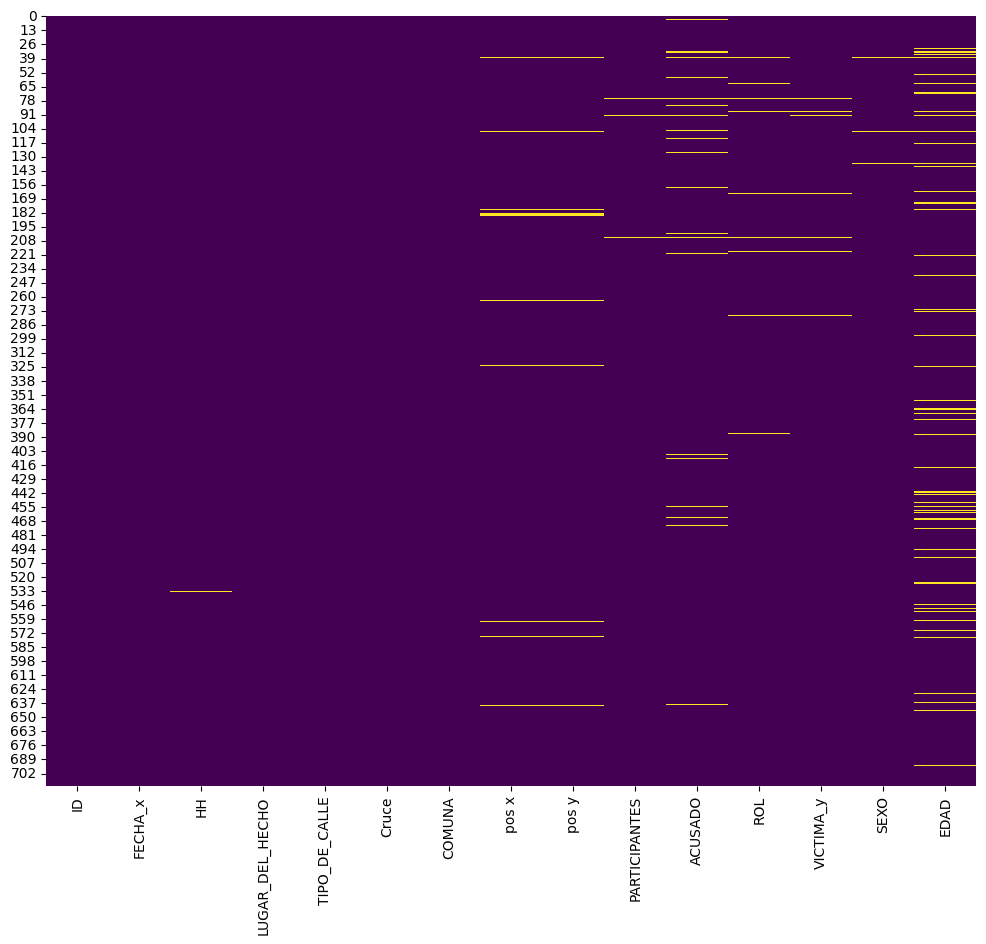

In [32]:
# Mapa de calor de valores nulos
plt.figure(figsize=(12, 10))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

## Visualización de los Datos

### Distribución de Rol y Sexo por Tipo de Calle

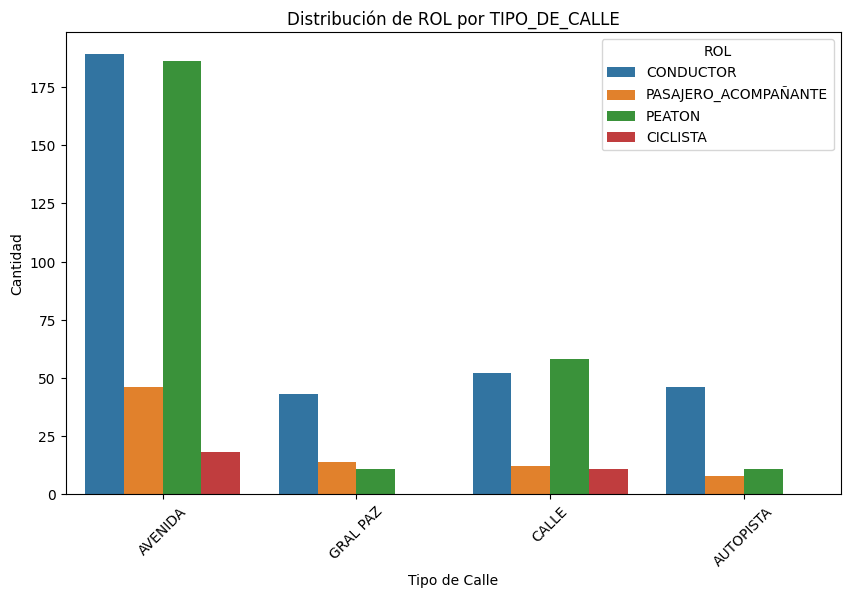

In [39]:
# Gráfico de barras apilado para ROL y TIPO_DE_CALLE
plt.figure(figsize=(10, 6))
sns.countplot(x='TIPO_DE_CALLE', hue='ROL', data=df)
plt.title('Distribución de ROL por TIPO_DE_CALLE')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

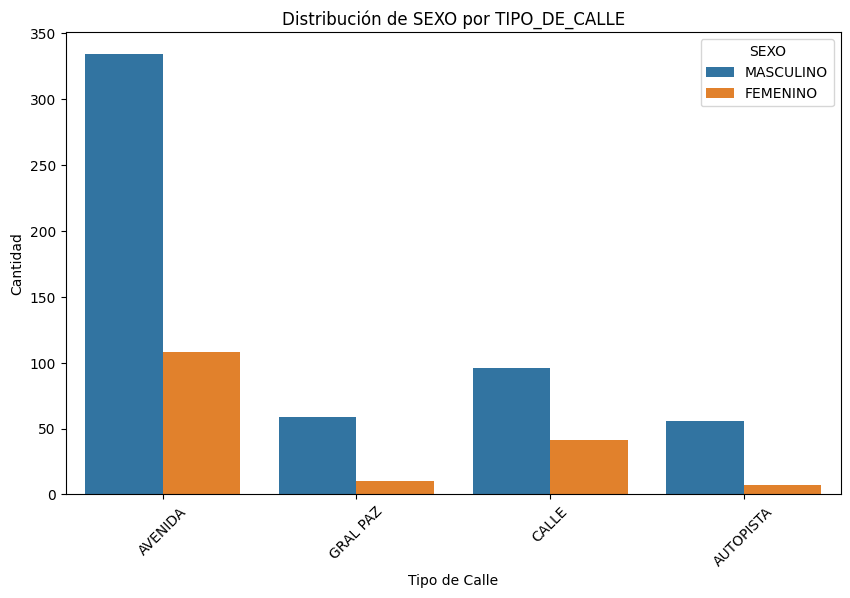

In [40]:
# Gráfico de barras apilado para SEXO y TIPO_DE_CALLE
plt.figure(figsize=(10, 6))
sns.countplot(x='TIPO_DE_CALLE', hue='SEXO', data=df)
plt.title('Distribución de SEXO por TIPO_DE_CALLE')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

### Distribución de Edad por Tipo de Calle

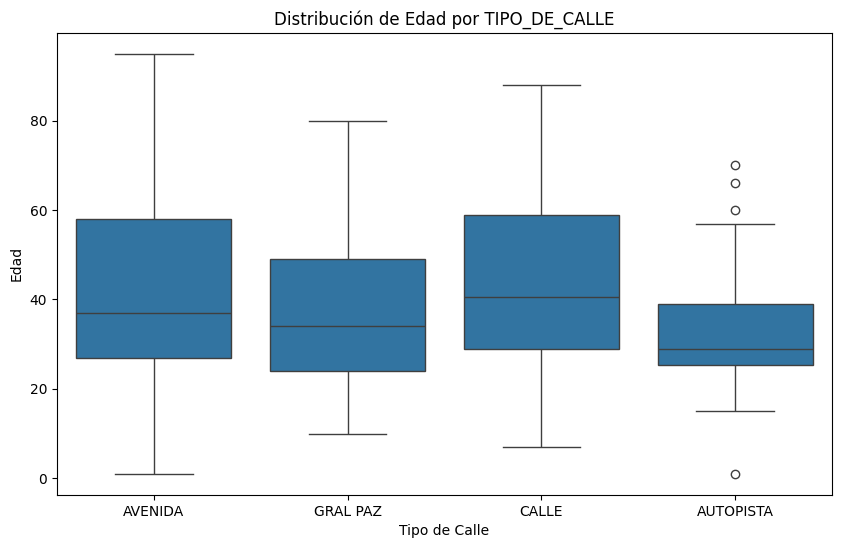

In [56]:
# boxplot de edad y tipo de calle
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_DE_CALLE', y='EDAD', data=df)
plt.title('Distribución de Edad por TIPO_DE_CALLE')
plt.xlabel('Tipo de Calle')
plt.ylabel('Edad')
plt.show()

### Cruce por Rol, Sexo y Edad

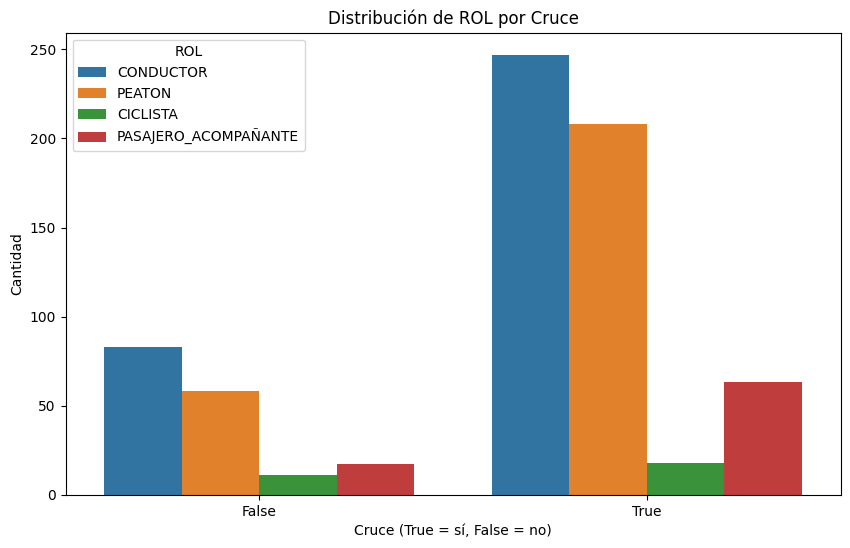

In [44]:
# Conteo de ROL según Cruce
plt.figure(figsize=(10, 6))
sns.countplot(x='Cruce', hue='ROL', data=df)
plt.title('Distribución de ROL por Cruce')
plt.xlabel('Cruce (True = sí, False = no)')
plt.ylabel('Cantidad')
plt.show()

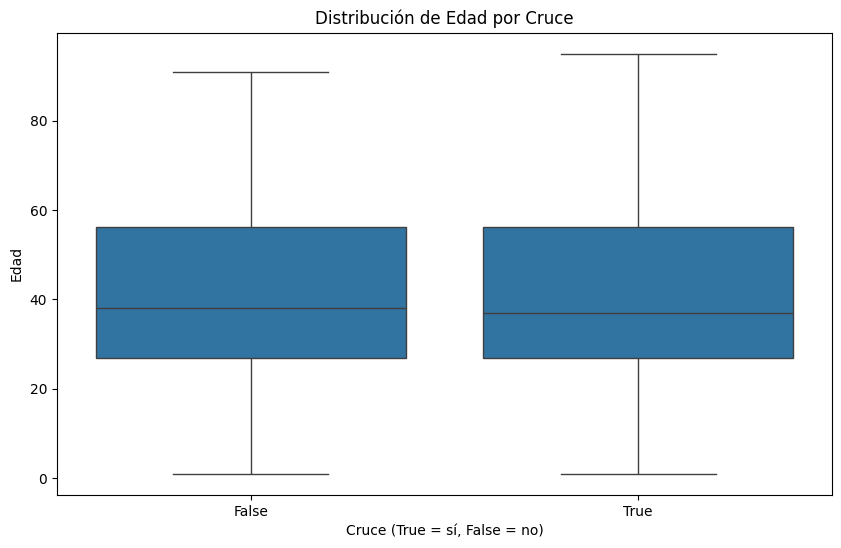

In [45]:
# Boxplot de EDAD por Cruce
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cruce', y='EDAD', data=df)
plt.title('Distribución de Edad por Cruce')
plt.xlabel('Cruce (True = sí, False = no)')
plt.ylabel('Edad')
plt.show()

### Distribución de Incidentes por Franja Horaria

In [46]:
# Convertir HH a formato numérico si es necesario
df['HH'] = pd.to_numeric(df['HH'], errors='coerce')

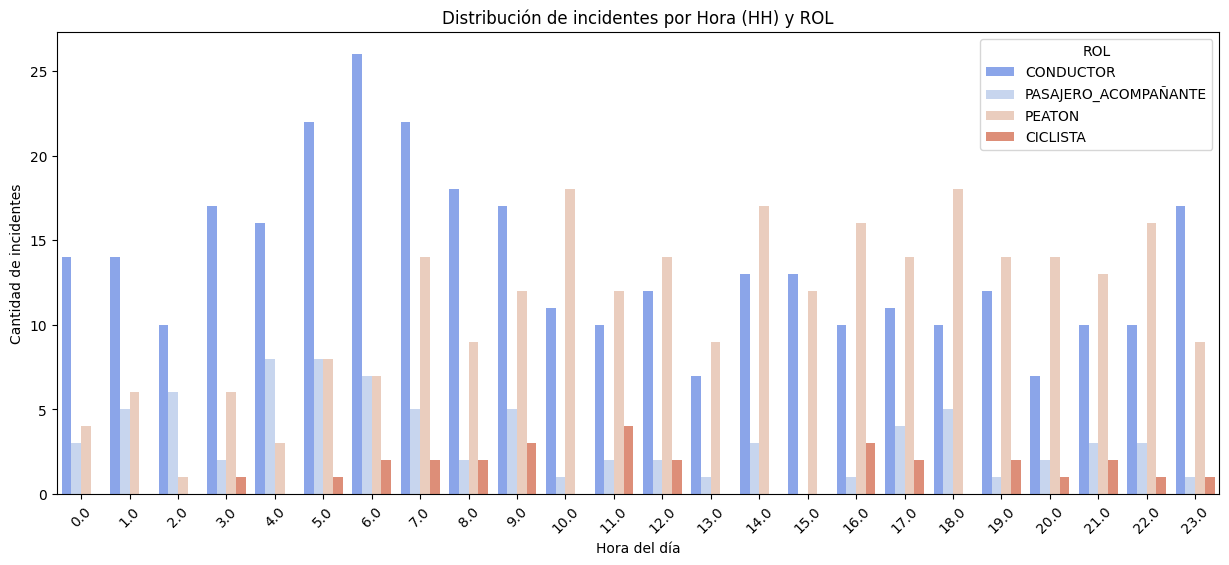

In [57]:
# Conteo de incidentes por hora y rol
plt.figure(figsize=(15, 6))
sns.countplot(x='HH', hue='ROL', data=df, palette='coolwarm')
plt.title('Distribución de incidentes por Hora (HH) y ROL')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de incidentes')
plt.xticks(rotation=45)
plt.show()

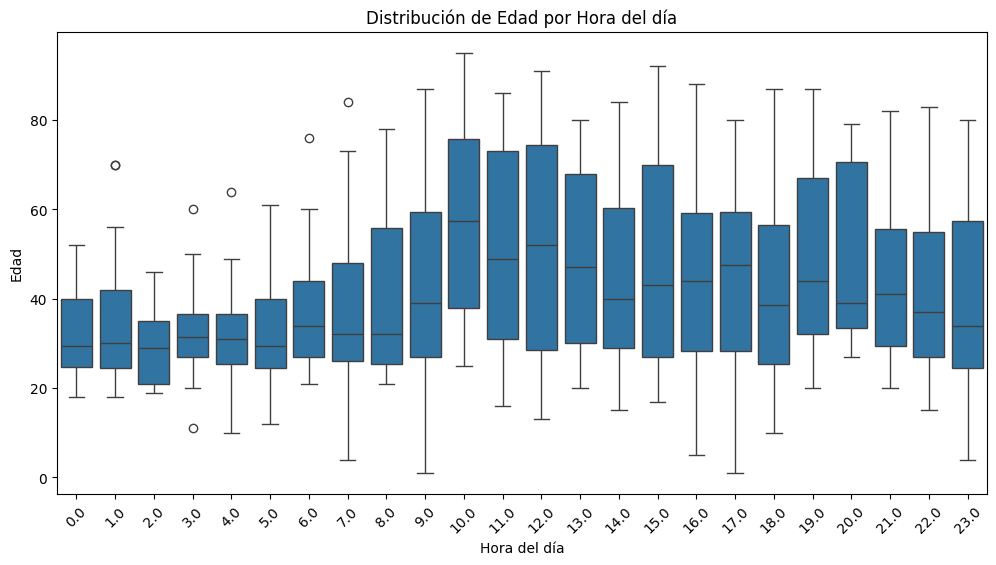

In [48]:
# Boxplot de EDAD según la hora del incidente
plt.figure(figsize=(12, 6))
sns.boxplot(x='HH', y='EDAD', data=df)
plt.title('Distribución de Edad por Hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

### Cruce vs Tipo de Calle por Rol y Edad

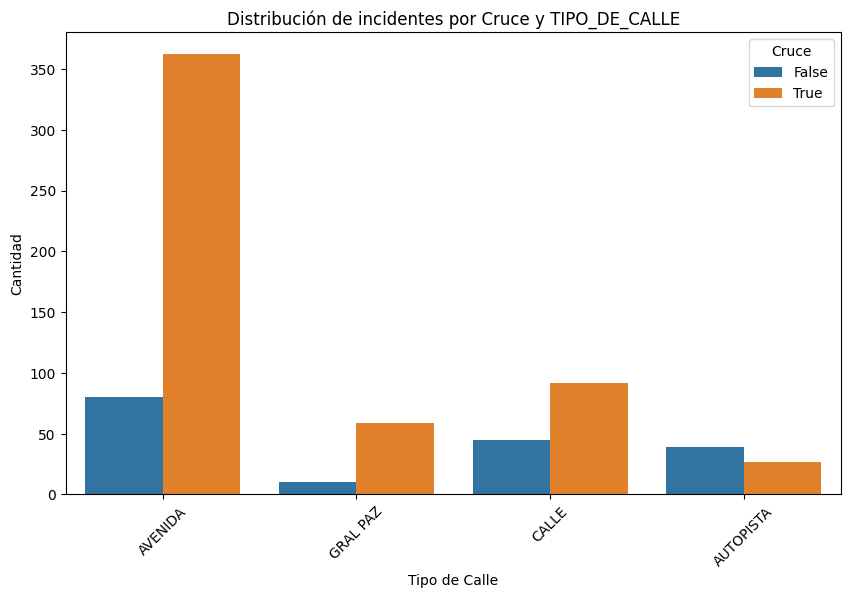

In [49]:
# Conteo de ROL según Cruce y Tipo de Calle
plt.figure(figsize=(10, 6))
sns.countplot(x='TIPO_DE_CALLE', hue='Cruce', data=df)
plt.title('Distribución de incidentes por Cruce y TIPO_DE_CALLE')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

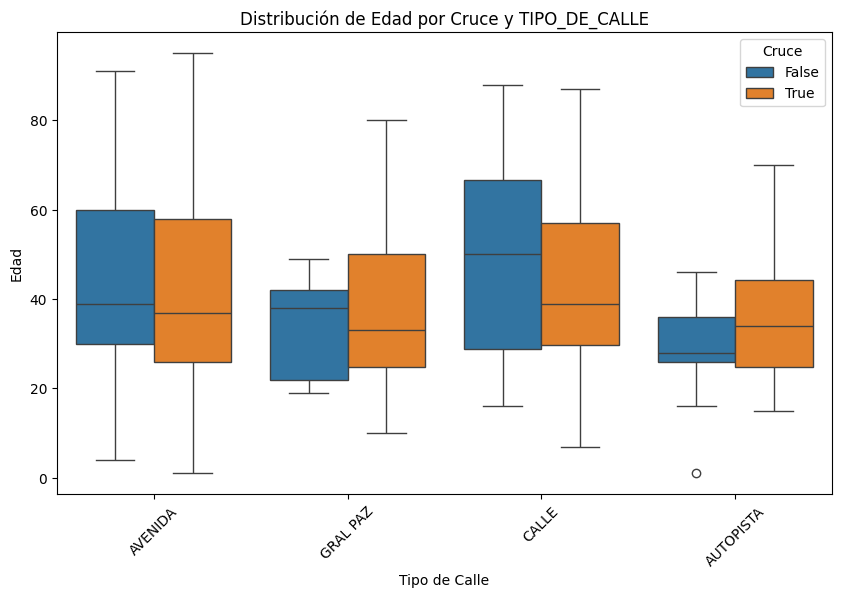

In [50]:
# Boxplot de EDAD por Cruce y Tipo de Calle
plt.figure(figsize=(10, 6))
sns.boxplot(x='TIPO_DE_CALLE', y='EDAD', hue='Cruce', data=df)
plt.title('Distribución de Edad por Cruce y TIPO_DE_CALLE')
plt.xlabel('Tipo de Calle')
plt.ylabel('Edad')
plt.xticks(rotation=45)
plt.show()

### Distribución de Sexo por Cruce y Tipo de Calle

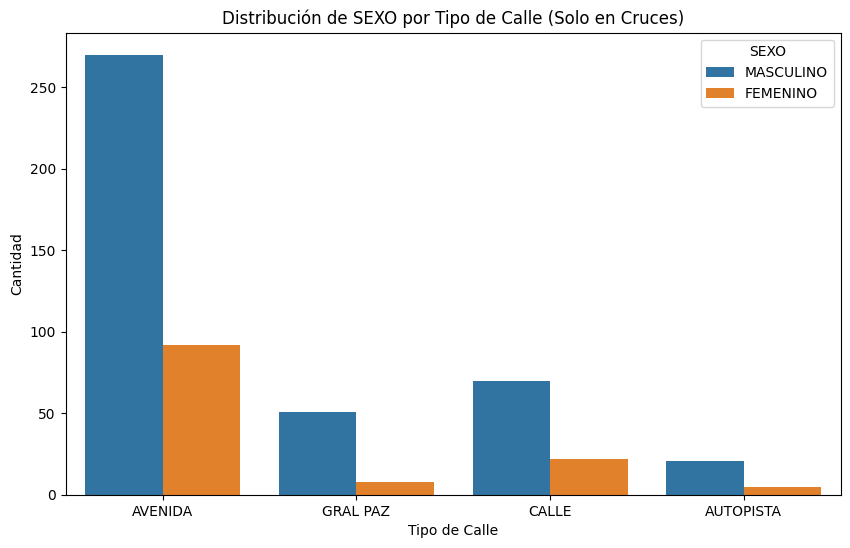

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TIPO_DE_CALLE', hue='SEXO', data=df[df['Cruce'] == True])
plt.title('Distribución de SEXO por Tipo de Calle (Solo en Cruces)')
plt.xlabel('Tipo de Calle')
plt.ylabel('Cantidad')
plt.show()

## Conclusiones:
### Distribución de Rol y Sexo por Tipo de Calle
- La mayoría de accidentes ocurren en avenidas y las víctimas más comúnes son Conductores y Peatones.
- En el tipo de calle Gral Paz, los conductores son las principales víctimas.
- En calles, las principales víctimas son Peatones y Conductores.
- En autopistas, las principales víctimas son conductores.
- No se observan víctimas ciclistas en Autopistas ni en Gral Paz.
- La mayor cantidad de hombres y mujeres que mueren en siniestros viales, fallecen en avenidas.
- La distribución de fallecimientos en Gral Paz y en Autopistas son prácticamente iguales.

### Distribución de Edad por Tipo de Calle
- La mayor cantidad de víctimas tienen entre 25 y 60 años tanto en calles (con una media aproximada de 40 años) como en avenidas (con una media menor a los 40 años y una mayor dispersión de datos).
- En Gral Paz, la mayor concentración de víctimas se encuentra (aproximadamente) entre un poco menos de 25 años y los 50 años (aprox) y la media se encuentra un poco por debajo que en las avenidas.
- En autopistas la mayor cantidad de víctimas se encuentran entre un poco menos de 25 años y 40 años (aprox) con una media aproximada de 25 años.
- En autopistas pueden distinguirse valores atípicos. Considerando que Gral Paz también es una autopista y que la mayoría de esos valores atípicos encajan en la distribución no se consideran un problema.
- Si bien Gral Paz es una autopista, es válido considerarla un elemento más, dado que tiene una gran cantidad de muertos.
- Se deja el valor atípico inferior en autopistas porque puede ser atípico, pero no significa que no sea real.

### Cruce por Rol, Edad y Sexo
- La mayoría de los accidentes ocurren en cruces y la mayoría de as víctimas, en ambos casos, son conductores y peatones.
- La distribución de edad de cruces y calles no varía demasiado.

### Distribución de Incidentes por Franja Horaria
- Los ciclistas tienden a ser víctimas en los siguientes horarios: de 3 a 4, de 5 a 10, de 11 a 13, de 16 a 18 y de 19 a 00.
- Entre las 23 y las 10 la mayoría de las víctimas son conductores, mientras que de 10 a 23 la mayoría de las víctimas son peatones.

### Distribución de Incidentes por franja horaria y edad
- Variabilidad de la edad: A lo largo del día, se observa una variabilidad significativa en la edad de las personas involucradas en incidentes. Esto es evidente por el rango de los bigotes y la dispersión de los outliers.
- Mayor dispersión alrededor de las 10:00 y 12:00 horas: Entre las horas de la mañana (10:00 - 12:00), parece haber una mayor dispersión de la edad, ya que los bigotes y el rango intercuartílico (IQR) son más amplios en comparación con otras horas. Esto sugiere que personas de diferentes grupos de edad están involucradas durante estas horas.
- Patrón estable desde las 14:00 hasta las 20:00: Durante las horas de la tarde (14:00 - 20:00), las edades parecen ser más consistentes, con rangos intercuartílicos menos dispersos y sin demasiados outliers.
- Outliers en varias horas: A lo largo del gráfico, hay puntos fuera de los bigotes (outliers), lo que sugiere que en ciertas horas hay individuos significativamente más jóvenes o más mayores que el rango general.
- Mediana de la edad constante: A lo largo del día, la mediana de la edad (línea dentro de cada caja) no varía drásticamente. Esto indica que, en general, la edad media de las personas involucradas en incidentes es relativamente constante, alrededor de los 40-50 años, en la mayoría de las horas.
- Horas con menos variación: A partir de las 22:00 horas hasta la medianoche, la dispersión de las edades se reduce, sugiriendo que los incidentes a esas horas tienden a involucrar a un grupo de edad más homogéneo.

## Exportar Archivo Final

In [58]:
# se exporta datadrame final como CSV a ../src/data/
df.to_csv('../src/data/merged_data.csv', index=False)